# 概率统计方法

## 简介

**`Python`** 中常用的统计工具有 **`Numpy, Pandas, PyMC, StatsModels`** 等。

**`Scipy`** 中的子库 `scipy.stats` 中包含很多统计上的方法。

导入 `numpy` 和 `matplotlib`：

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [141]:
heights = np.array([1.46, 1.79, 2.01, 1.75, 1.56, 1.69, 1.88, 1.76, 1.88, 1.78])

Numpy 自带简单的统计方法

In [41]:
print('mean', heights.mean())
print('min', heights.min())
print('max', heights.max())
print('standard deviation', heights.std())

mean 1.7559999999999998
min 1.46
max 2.01
standard deviation 0.15081114017207078


导入 `Scipy` 的统计模块

In [42]:
import scipy.stats.stats as st

其他统计量

In [43]:
print('median, ', np.nanmedian(heights))    #忽略nan值之后的所有数的中位数
print('mode, ', st.mode(heights))           #众数及其出现次数
print('skewness, ', st.skew(heights))       #偏度
print('kurtosis, ', st.kurtosis(heights))   #峰度
print('and so many more...')

median,  1.77
mode,  ModeResult(mode=array([1.88]), count=array([2]))
skewness,  -0.3935244564726347
kurtosis,  -0.33067209772439865
and so many more...


## 概率分布

常见的[连续概率分布](https://zh.wikipedia.org/wiki/Category:%E8%BF%9E%E7%BB%AD%E5%88%86%E5%B8%83)有：

- 均匀分布
- 正态分布
- 学生`t`分布
- `F`分布
- `Gamma`分布
- ...

[离散概率分布](https://zh.wikipedia.org/wiki/Category:%E7%A6%BB%E6%95%A3%E5%88%86%E5%B8%83)：

- 伯努利分布
- 几何分布
- ...

这些都可以在 `scipy.stats` 中找到。

## 连续分布

### 正态分布

以正态分布为例，先导入正态分布

In [44]:
from scipy.stats import norm

它包含四类常用的函数：

- `norm.cdf` 返回对应的[累计分布函数](https://zh.wikipedia.org/wiki/%E7%B4%AF%E7%A7%AF%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0)值
- `norm.pdf` 返回对应的[概率密度函数](https://zh.wikipedia.org/wiki/%E6%A9%9F%E7%8E%87%E5%AF%86%E5%BA%A6%E5%87%BD%E6%95%B8)值
- `norm.rvs` 产生指定参数的随机变量
- `norm.fit` 返回给定数据下，各参数的[最大似然估计](https://zh.wikipedia.org/wiki/%E6%9C%80%E5%A4%A7%E4%BC%BC%E7%84%B6%E4%BC%B0%E8%AE%A1)（MLE）值

从正态分布产生500个随机点：

In [45]:
x_norm = norm.rvs(size=500)
type(x_norm)

numpy.ndarray

直方图

counts,  [  6.  27.  59.  94. 132. 107.  47.  23.   4.   1.]
bin centers,  [-2.86459748 -2.22674624 -1.58889499 -0.95104375 -0.31319251  0.32465874
  0.96250998  1.60036123  2.23821247  2.87606371  3.51391496]


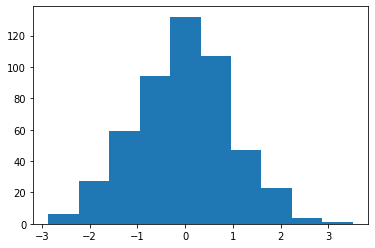

In [48]:
h = plt.hist(x_norm)
print('counts, ', h[0])
print('bin centers, ', h[1])

归一化直方图（用出现频率代替次数），将划分区间变为 `20`（默认 `10`）：

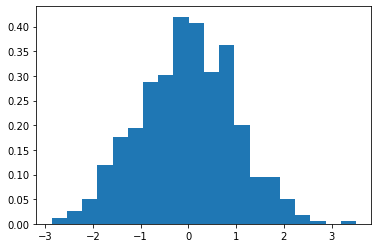

In [66]:
import matplotlib.pyplot as plt
h = plt.hist(x_norm, density=True, bins=20)

在这组数据下，正态分布参数的最大似然估计值为：

In [64]:
x_mean, x_std = norm.fit(x_norm)
print('mean', x_mean)
print('x_std', x_std)

mean -0.02849588164276546
x_std 1.0016427466982762


将真实的概率密度函数与直方图进行比较：

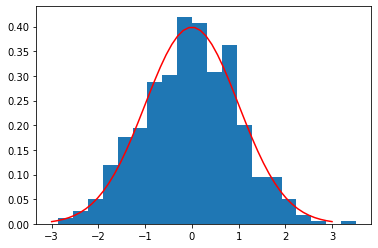

In [69]:
h = plt.hist(x_norm, density=True, bins=20)
x = np.linspace(-3, 3, 50)
p = plt.plot(x, norm.pdf(x), 'r-')

导入积分函数：

In [70]:
from scipy.integrate import trapz

通过积分，计算落在某个区间的概率大小：

95.45% of the values lie between -2 and 2


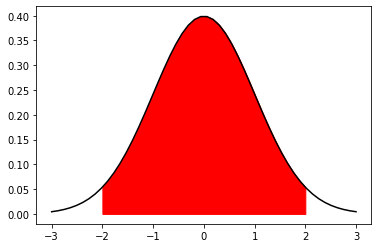

In [71]:
x1 = np.linspace(-2, 2, 108)
p = trapz(norm.pdf(x1), x1)
print('{:.2%} of the values lie between -2 and 2'.format(p))

plt.fill_between(x1, norm.pdf(x1), color='red')
plt.plot(x, norm.pdf(x), 'k-')

默认情况，正态分布的参数为均值0，标准差1，即标准正态分布。

可以通过 `loc` 和 `scale` 来调整这些参数，一种方法是调用相关函数时进行输入：

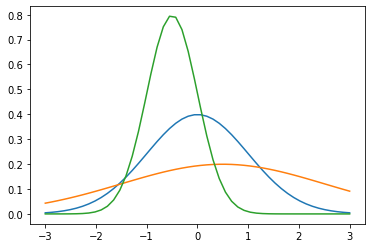

In [74]:
p = plt.plot(x, norm.pdf(x, loc=0, scale=1))
p = plt.plot(x, norm.pdf(x, loc=0.5, scale=2))
p = plt.plot(x, norm.pdf(x, loc=-0.5, scale=0.5))

另一种则是将 `loc, scale` 作为参数直接输给 `norm` 生成相应的分布：

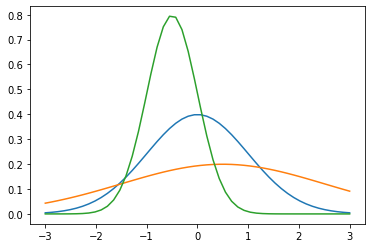

In [77]:
p = plt.plot(x, norm(loc=0, scale=1).pdf(x))
p = plt.plot(x, norm(loc=0.5, scale=2).pdf(x))
p = plt.plot(x, norm(loc=-0.5, scale=0.5).pdf(x))

### 其他连续分布

In [78]:
from scipy.stats import lognorm, t, dweibull

支持与 `norm` 类似的操作，如概率密度函数等。

不同参数的[对数正态分布](https://zh.wikipedia.org/wiki/%E5%AF%B9%E6%95%B0%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83)：

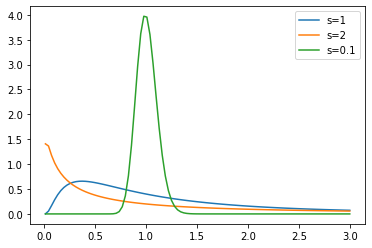

In [82]:
x = np.linspace(0.01, 3, 100)

plt.plot(x, lognorm.pdf(x,1), label='s=1')
plt.plot(x, lognorm.pdf(x,2), label='s=2')
plt.plot(x, lognorm.pdf(x,.1), label='s=0.1')

plt.legend()

不同的[韦氏分布](https://zh.wikipedia.org/wiki/%E9%9F%A6%E4%BC%AF%E5%88%86%E5%B8%83)：

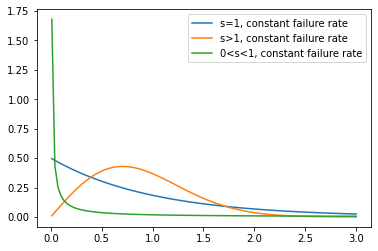

In [87]:
x = np.linspace(0.01, 3,100)

plt.plot(x, dweibull.pdf(x, 1), label='s=1, constant failure rate')
plt.plot(x, dweibull.pdf(x, 2), label='s>1, constant failure rate')
plt.plot(x, dweibull.pdf(x, .1), label='0<s<1, constant failure rate')

plt.legend()

不同自由度的[学生 `t` 分布](https://zh.wikipedia.org/wiki/%E5%AD%A6%E7%94%9Ft-%E5%88%86%E5%B8%83)：

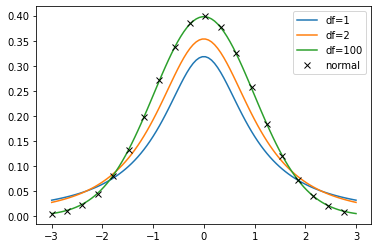

In [98]:
x = np.linspace(-3, 3, 100)

plt.plot(x, t.pdf(x, 1), label='df=1')
plt.plot(x, t.pdf(x, 2), label='df=2')
plt.plot(x, t.pdf(x, 100), label='df=100')
plt.plot(x[::5], norm.pdf(x[::5]), 'kx', label='normal')

plt.legend()

## 离散分布

导入离散分布：

In [99]:
from scipy.stats import binom, poisson, randint

离散分布没有概率密度函数，但是有[概率质量函数](https://zh.wikipedia.org/wiki/%E6%A6%82%E7%8E%87%E8%B4%A8%E9%87%8F%E5%87%BD%E6%95%B0)。

[离散均匀分布](https://zh.wikipedia.org/wiki/%E9%9B%A2%E6%95%A3%E5%9E%8B%E5%9D%87%E5%8B%BB%E5%88%86%E4%BD%88)的概率质量函数（PMF）：

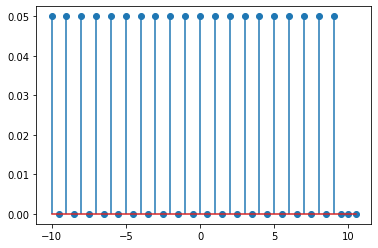

In [124]:
high = 10
low = -10

x = np.arange(low, high+1, 0.5)
p = plt.stem(x, randint(low, high).pmf(x))

[二项分布](https://zh.wikipedia.org/wiki/%E4%BA%8C%E9%A0%85%E5%88%86%E4%BD%88)：

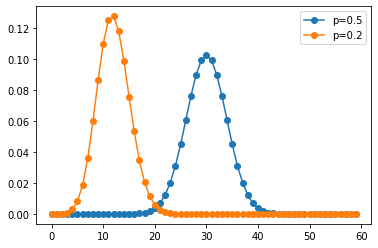

In [127]:
num_trials = 60
x = np.arange(num_trials)

plt.plot(x, binom(num_trials, 0.5).pmf(x), 'o-', label='p=0.5')
plt.plot(x, binom(num_trials, 0.2).pmf(x), 'o-', label='p=0.2')

plt.legend()

[泊松分布](https://zh.wikipedia.org/wiki/%E6%B3%8A%E6%9D%BE%E5%88%86%E4%BD%88)：

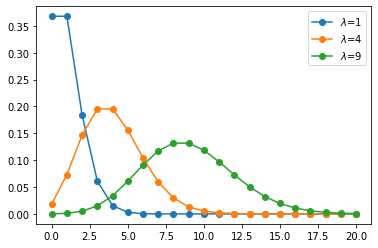

In [140]:
x = np.arange(0, 21)

plt.plot(x, poisson(1).pmf(x), 'o-', label='$\lambda$=1')
plt.plot(x, poisson(4).pmf(x), 'o-', label='$\lambda$=4')
plt.plot(x, poisson(9).pmf(x), 'o-', label='$\lambda$=9')

plt.legend()

## 自定义离散分布

导入要用的函数

In [142]:
from scipy.stats import rv_discrete

一个不均匀的骰子对应的离散值及其概率

In [143]:
xk = [1,2,3,4,5,6]
pk = [.3, .35, .25, .05, .025, .025]

定义离散分布

In [144]:
loaded = rv_discrete(values=(xk, pk))

此时， `loaded` 可以当作一个离散分布的模块来使用。

产生两个服从该分布的随机变量：

In [147]:
loaded.rvs(size=2)

array([3, 2])

产生两个服从该分布的随机变量：

<StemContainer object of 3 artists>

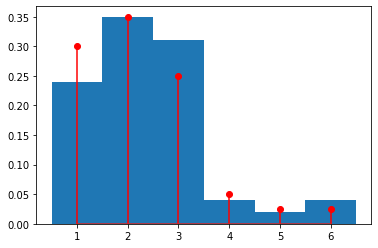

In [154]:
samples = loaded.rvs(size=100)
bins = np.linspace(.5, 6.5, 7)

plt.hist(samples, bins=bins, density=True)
plt.stem(xk, loaded.pmf(xk), markerfmt='ro', linefmt='r-')

## 假设检验

导入相关的函数：

- 正态分布
- 独立双样本 `t` 检验，配对样本 `t` 检验，单样本 `t` 检验
- 学生 `t` 分布

`t` 检验的相关内容请参考：
- 百度百科-`t` 检验：http://baike.baidu.com/view/557340.htm
- 维基百科-学生 `t` 检验：https://en.wikipedia.org/wiki/Student%27s_t-test

In [155]:
from scipy.stats import norm
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import t

### 独立样本 t 检验

两组参数不同的正态分布：

In [156]:
n1 = norm(loc=0.3, scale=1.0)
n2 = norm(loc=0, scale=1.0)

从分布中产生两组随机样本：

In [158]:
n1_samples = n1.rvs(size=100)
n2_samples = n2.rvs(size=100)

将两组样本混合在一起：

In [159]:
samples = np.hstack((n1_samples, n2_samples))

最大似然参数估计：

In [160]:
loc, scale = norm.fit(samples)
n = norm(loc=loc, scale=scale)

比较

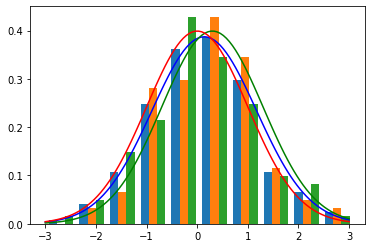

In [163]:
x = np.linspace(-3, 3, 100)

plt.hist([samples, n1_samples, n2_samples], density=True)
plt.plot(x, n.pdf(x), 'b-')
plt.plot(x, n1.pdf(x), 'g-')
plt.plot(x, n2.pdf(x), 'r-')

独立双样本 `t` 检验的目的在于判断两组样本之间是否有显著差异：

In [164]:
t_val, p = ttest_ind(n1_samples, n2_samples)

print('t = {}'.format(t_val))
print('p-values = {}'.format(p))

t = 1.458382426263798
p-values = 0.14631957809667487


`p` 值小，说明这两个样本有显著性差异。

### 配对样本 t 检验

配对样本指的是两组样本之间的元素一一对应，例如，假设我们有一组病人的数据：

In [171]:
pop_size = 35

pre_treat = norm(loc=0, scale=1)
n0 = pre_treat.rvs(size=pop_size)

经过某种治疗后，对这组病人得到一组新的数据：

In [172]:
effect = norm(loc=0.05, scale=0.2)
eff = effect.rvs(size=pop_size)

n1 = n0 + eff

新数据的最大似然估计：

In [173]:
loc, scale = norm.fit(n1)
post_treat = norm(loc=loc, scale=scale)

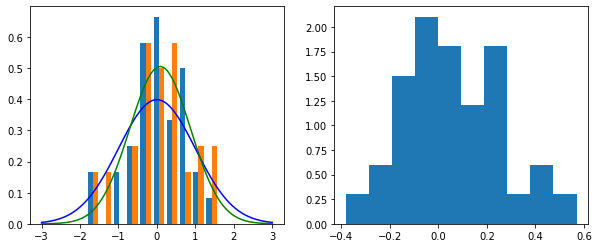

In [176]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1,2,1)
h = ax1.hist([n0, n1], density=True)
p = ax1.plot(x, pre_treat.pdf(x), 'b-')
p = ax1.plot(x, post_treat.pdf(x), 'g-')

ax2 = fig.add_subplot(1,2,2)
h = ax2.hist(eff, density=True)

独立 `t` 检验：

In [177]:
t_val, p = ttest_ind(n0, n1)
print('t = {}'.format(t_val))
print('p-value = {}'.format(p))

t = -0.33830510454920587
p-value = 0.7361755943713746


高 `p` 值说明两组样本之间没有显著性差异。

配对 `t` 检验：

In [178]:
t_val, p = ttest_rel(n0, n1)
print('t = {}'.format(t_val))
print('p-value = {}'.format(p))

t = -1.8206671381557202
p-value = 0.0774687655453426


配对 `t` 检验的结果说明，配对样本之间存在显著性差异，说明治疗时有效的，符合我们的预期。

### `p` 值计算原理 

`p` 值对应的部分是下图中的红色区域，边界范围由 `t` 值决定。 

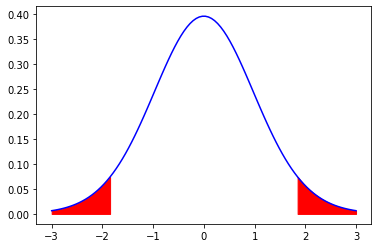

In [184]:
my_t = t(pop_size)

p =  plt.plot(x, my_t.pdf(x), 'b-')
lower_x = x[x<= -abs(t_val)]
upper_x = x[x>= abs(t_val)]

p = plt.fill_between(lower_x, my_t.pdf(lower_x), color='red')
p = plt.fill_between(upper_x, my_t.pdf(upper_x), color='red')